This notebook is used for plotting the figures present in the paper

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rcParams

from matplotlib import font_manager

from ComptonSpec_classic import Trajectory, Spectrum
from utils_simulation import *
from utils_analytics import *

In [2]:
rcParams['mathtext.fontset'] = 'cm'
rcParams["font.family"] = 'Times New Roman'

hfont = {'fontname':'Times New Roman'}

legend_font = font_manager.FontProperties(family='Times New Roman',
                                          weight='normal',
                                          style='normal',
                                          stretch='ultra-expanded',
                                          size=18)

## Load all data

In [5]:
folder_sim_tau_2 = 'data/simulation/tau_2'
data = load_data_fixed_tau(folder_sim_tau_2)
w_a0_list_tau_2, N_ph_a0_list_tau_2 = data[:2]
beta_arr_tau_2, a0_arr_tau_2, N_max_beta_a0_tau_2, beta_optimal_tau_2 = data[2:]

folder_th_tau_2 = 'data/analytics/tau_2'
data = load_analytics_fixed_tau(folder_th_tau_2)
beta_arr_th_tau_2, a0_arr_th_tau_2, beta_cusp_tau_2 = data[0], data[1], data[2]
beta_Pe_tau_2, w_Pe_tau_2 = data[3], data[4]
beta_Taylor_tau_2, w_Taylor_tau_2 = data[5], data[6]

folder_sim_tau_4 = 'data/simulation/tau_4'
data = load_data_fixed_tau(folder_sim_tau_4)
w_a0_list_tau_4, N_ph_a0_list_tau_4 = data[:2]
beta_arr_tau_4, a0_arr_tau_4, N_max_beta_a0_tau_4, beta_optimal_tau_4 = data[2:]

folder_th_tau_4 = 'data/analytics/tau_4'
data = load_analytics_fixed_tau(folder_th_tau_4)
beta_arr_th_tau_4, a0_arr_th_tau_4, beta_cusp_tau_4 = data[0], data[1], data[2]
beta_Pe_tau_4, w_Pe_tau_4 = data[3], data[4]
beta_Taylor_tau_4, w_Taylor_tau_4 = data[5], data[6]

folder_sim_tau_6 = 'data/simulation/tau_6'
data = load_data_fixed_tau(folder_sim_tau_6)
w_a0_list_tau_6, N_ph_a0_list_tau_6 = data[:2]
beta_arr_tau_6, a0_arr_tau_6, N_max_beta_a0_tau_6, beta_optimal_tau_6 = data[2:]

folder_th_tau_6 = 'data/analytics/tau_6'
data = load_analytics_fixed_tau(folder_th_tau_6)
beta_arr_th_tau_6, a0_arr_th_tau_6, beta_cusp_tau_6 = data[0], data[1], data[2]
beta_Pe_tau_6, w_Pe_tau_6 = data[3], data[4]
beta_Taylor_tau_6, w_Taylor_tau_6 = data[5], data[6]

### Figure 1. Spectral gauss laser pulses and their spectra for different chirp parameters

In [165]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 2 * np.pi    # Pulse duration
a0 = 1.5             # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
beta_arr = [0, 2, 4]            # Chirp parameter
polarization = 'circular'
wb = [0.,1.5]

A_list, eta_list, w_list, I_list = [], [], [], []
eta_b = 4*tau*np.sqrt(1+beta_arr[-1]**2)
for beta in beta_arr:
    # Define laser phase grid and calculate vector potential
    # eta_b = 4.4*tau*np.sqrt(1+beta**2)
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau, a0, beta)
    u, r = traj.calc_u_x(A, eta)
    eta_list.append(eta)
    A_list.append(A)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    theta = np.pi
    phi = 0
    I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi)
    idx = (w >= wb[0]) & (w <= wb[1])
    w_list.append(w[idx])
    I_list.append(I[idx])

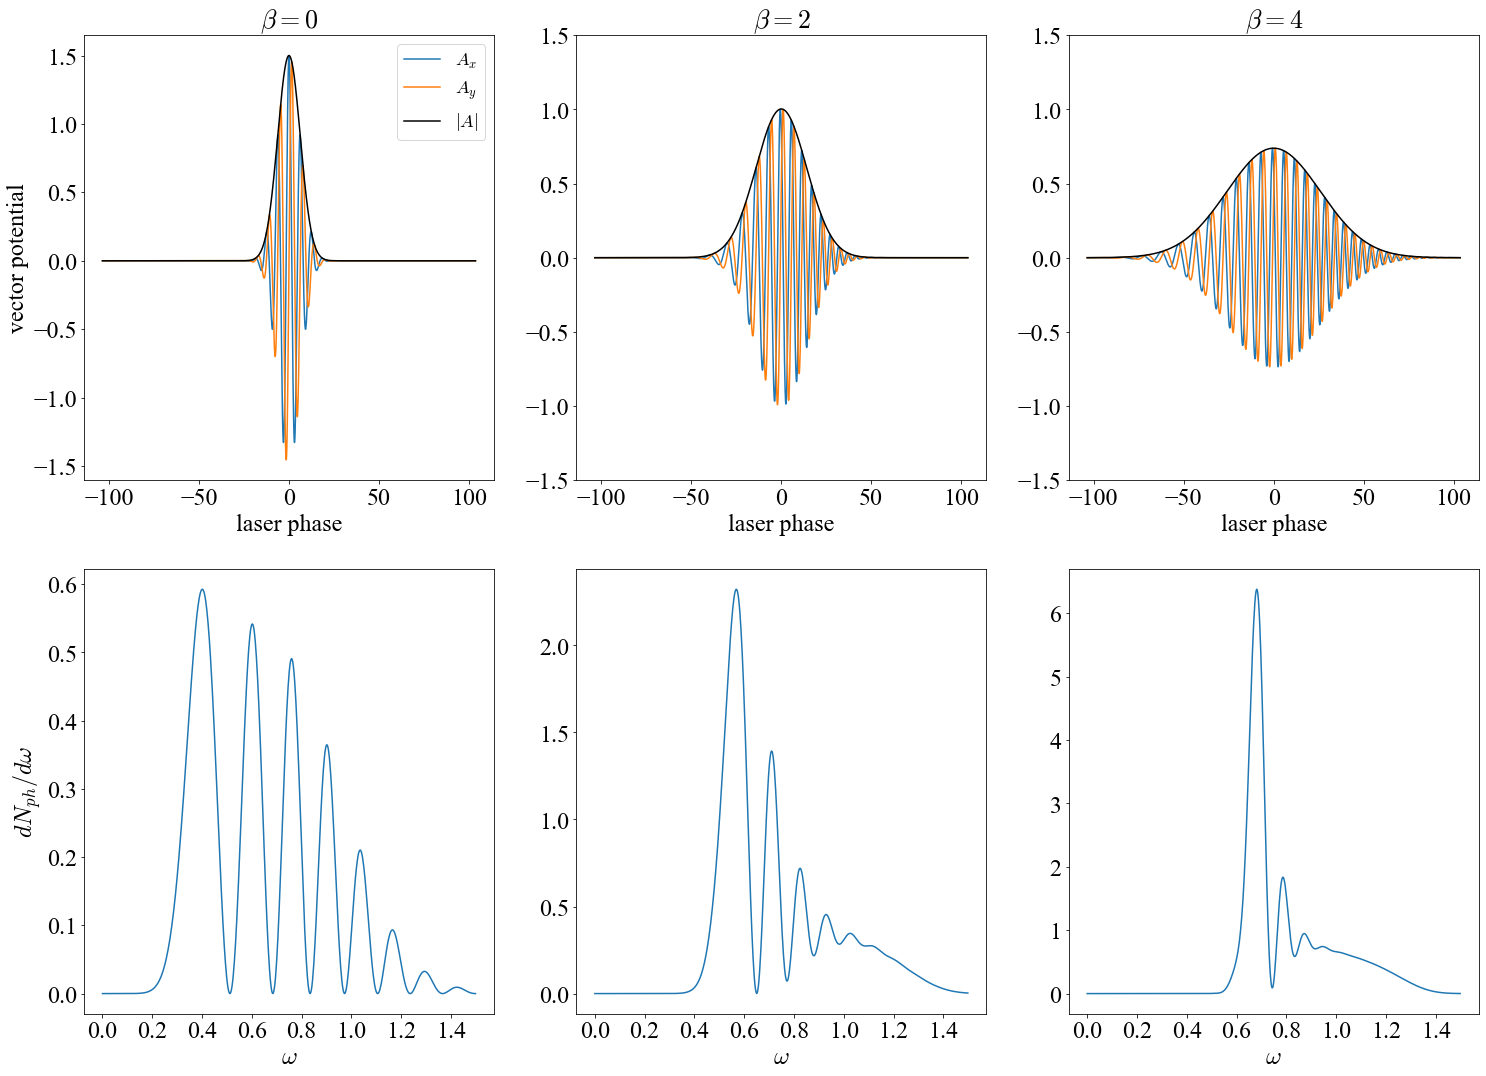

In [166]:
fig, ax = plt.subplots(figsize=(25,18))

for i in range(3):
    A = A_list[i]
    A_mod = np.sqrt(A[0]**2 + A[1]**2)
    plt.subplot(2,3,i+1)
    plt.plot(eta_list[i], A[0], label='$A_x$')
    plt.plot(eta_list[i], A[1], label='$A_y$')
    plt.plot(eta_list[i], A_mod, label='$|A|$', color='black')
    plt.title(f'$\\beta = {beta_arr[i]}$', fontsize=26)
    if i == 0:
        plt.legend(loc='best', prop=legend_font)
        plt.ylabel('vector potential', fontsize=24)
    plt.xlabel('laser phase', fontsize=24)
    plt.xticks([-100, -50, 0, 50, 100], fontsize=24)
    plt.yticks([-1.5, -1.0, -0.5, 0., 0.5, 1.0, 1.5], fontsize=24)
    
    plt.subplot(2,3,3+i+1)
    plt.plot(w_list[i], I_list[i])
    plt.xlabel('$\omega$', fontsize=24)
    if i == 0:
        plt.ylabel('$d N_{ph}/d\omega$', fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
plt.show()

### Figure 2. $\beta(a_0)$ + 2d colormap as background

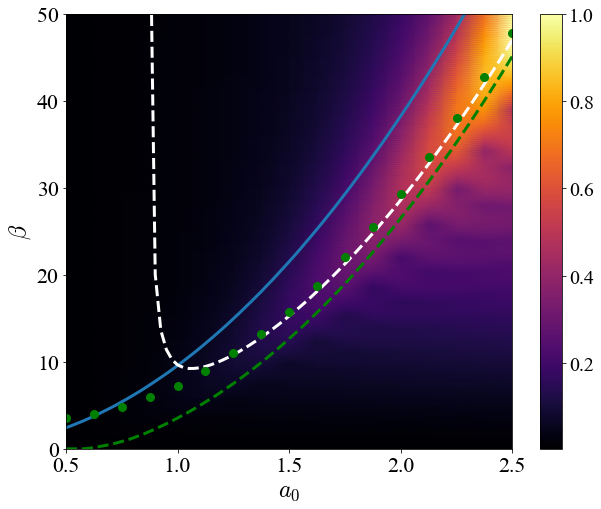

In [168]:
tau = 4*np.pi

if tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_cusp = beta_cusp_tau_4.copy()
    beta_Pe = beta_Pe_tau_4.copy()
    beta_Taylor = beta_Taylor_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()

idx_Taylor = (a0_arr_th > 0.87)

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0/N_max_beta_a0.max(), cmap='inferno',
              shading='gouraud')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)

plt.plot(a0_arr_th, beta_cusp, color='tab:blue', linewidth=3, label='cusp-on-axis')
plt.plot(a0_arr_th, beta_Pe, '--', color='green', linewidth=3, label='Pearcey max')
plt.plot(a0_arr_th[idx_Taylor], beta_Taylor[idx_Taylor], '--', color='white', linewidth=3, label='Taylor correction')

plt.plot(a0_arr, beta_optimal, 'o', color='green', markersize=8, label='simulation')

ax.set_ylim([0,50])
# plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.yticks(fontsize=22)
# plt.legend(loc='best', fontsize=22)
plt.show()

### Figure 3. $N_{max} (a_0)$ enchancement of chirped case over linear Compton 

8.61928457351383


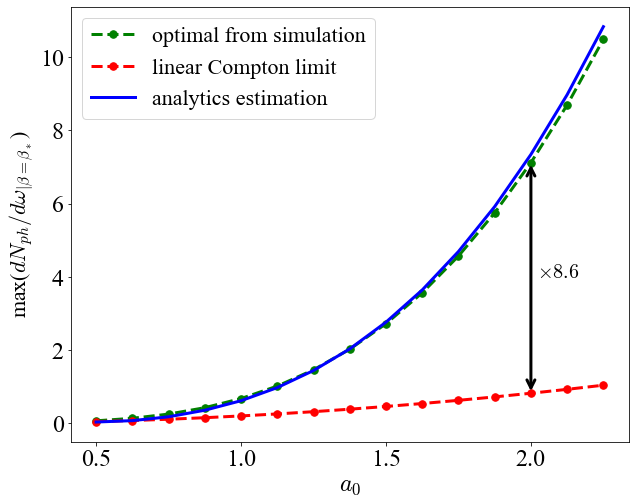

In [171]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 6*np.pi

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


a0 = 2
idx = np.where(np.isclose(a0_arr, a0))[0][0]
increase = Nmax_optimal[idx] / Nmax_linear[idx]
print(increase)


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr, Nmax_optimal, '--.', color='green', linewidth=3, markersize=15, label='optimal from simulation')
plt.plot(a0_arr, Nmax_linear, '--.', color='red', linewidth=3, markersize=15, label='linear Compton limit')
plt.plot(a0_arr, Nmax_estimation, '-', color='blue', linewidth=3, label='analytics estimation')
# plt.title('$\\tau = 6\pi$', fontsize=20)

ax.annotate('', xy=(a0,Nmax_optimal[idx]), xytext=(a0,Nmax_linear[idx]),
            arrowprops={'arrowstyle':'<->', 'lw':3, 'color':'black', 'ls':'-',
                        'mutation_scale':20})
plt.text(a0+0.02, 0.5*(Nmax_optimal[idx] + Nmax_linear[idx]), 
         '$\\times 8.6$', fontsize=20)

plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|\\beta=\\beta_*}$)', fontsize=22)
plt.legend(loc='best', fontsize=22)
plt.xticks([0.5, 1, 1.5, 2], fontsize=24)
plt.yticks(fontsize=24)
plt.show()

### Figure 4. $N_{max} (\beta)$ for fixed $a_0, \tau$

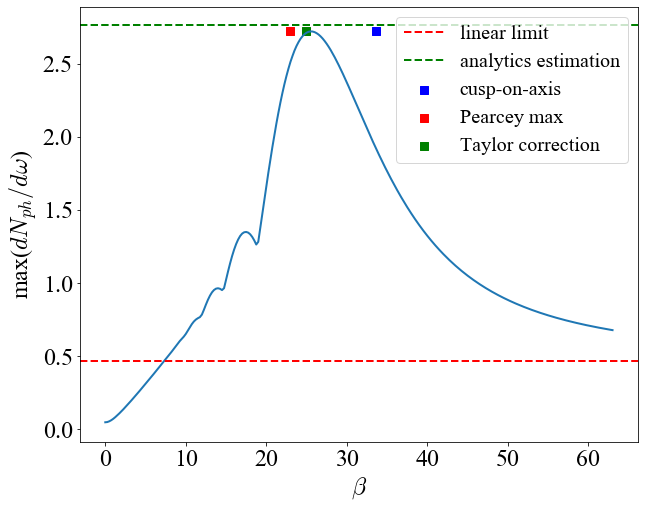

In [173]:
tau = 6*np.pi
a0 = 1.5

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()

idx = np.where(np.isclose(a0_arr, a0))[0][0]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(beta_arr, N_max_beta_a0[:,idx], linewidth=2)
y_pos = np.max(N_max_beta_a0[:,idx])

# plt.scatter(beta_optimal[idx], y_pos, color='orange', marker='*', s=200)
plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', s=80, label='cusp-on-axis')
plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', s=80, label='Pearcey max')
plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', s=80, label='Taylor correction')

ax.axhline(Nmax_linear[idx], linestyle='--', color='red', linewidth=2, label='linear limit')
ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', linewidth=2, label='analytics estimation')

plt.xlabel('$\\beta$', fontsize=24)
plt.ylabel('max($dN_{ph}/d\omega$)', fontsize=24)
# plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

### Figure 5. $\beta(\omega)$ folds and cusp + predictions

In [160]:
tau = 4*np.pi
a0 = 2

if tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    N_ph_a0_list = N_ph_a0_list_tau_4
    w_a0_list = w_a0_list_tau_4

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

idx = np.where(np.isclose(a0_arr, a0))[0][0]

idx_beta, idx_w = np.where(N_ph_a0_list[idx] == N_ph_a0_list[idx].max())
beta_fold, w_fold = calculate_fold_w_beta(beta_arr, a0_arr[idx],
                                          tau, eps=3e-2)

In [161]:
def solve_fold_equation(phi_arr, beta, a0=1, tau=2*np.pi):
    '''
    Calculate error for the fold equation for an array of laser phase phi_arr
    '''
    a_sq = 2*a0**2 / np.sqrt(1 + beta**2)
    tau_eff = tau * np.sqrt(1 + beta**2)
    prefactor = a_sq * np.exp(-(phi_arr/tau_eff)**2)
    lhs = (2*phi_arr*(1 + beta*phi_arr/tau_eff**2) + beta) * prefactor
    rhs = -2*beta
    err = np.abs(lhs - rhs)
    return err


def calculate_w_on_fold(phi_fold, beta, a0=1, tau=2*np.pi):
    '''
    Calculate frequency on fold (for spesified array phi_fold)
    '''
    a_sq = 2*a0**2 / np.sqrt(1 + beta**2)
    tau_eff = tau * np.sqrt(1 + beta**2)
    w_L = 1 + beta*phi_fold/tau_eff**2
    w = w_L / (1 + 0.5*a_sq*np.exp(-(phi_fold/tau_eff)**2))
    return w

def calculate_fold_left_right(beta_arr, a0=1, tau=2*np.pi, eps=3e-2):
    beta_left, beta_right = [], []
    w_left, w_right = [], []
    for i,beta in enumerate(beta_arr):
        phi_b = 3*tau*np.sqrt(1+beta**2)
        phi_arr = np.linspace(-phi_b, phi_b, int(2*phi_b*500))
        err = solve_fold_equation(phi_arr, beta, a0, tau)
        idx_phi = (err < eps)
        phi_fold = phi_arr[idx_phi]
        
        if len(phi_fold) > 0:
            idx_left = (phi_fold < np.mean(phi_fold))
            idx_right = (phi_fold > np.mean(phi_fold))
            if np.sum(idx_left) > 0:
                phi_left = phi_fold[idx_left][0]
                w = calculate_w_on_fold(phi_left, beta, a0, tau)
                beta_left.append(beta)
                w_left.append(w)
            if np.sum(idx_right) > 0:
                phi_right = phi_fold[idx_right][0]
                w = calculate_w_on_fold(phi_right, beta, a0, tau)
                beta_right.append(beta)
                w_right.append(w)
    return np.array(beta_left), np.array(w_left), np.array(beta_right), np.array(w_right)

In [162]:
beta_left, w_left, beta_right, w_right = calculate_fold_left_right(beta_arr, a0, tau)

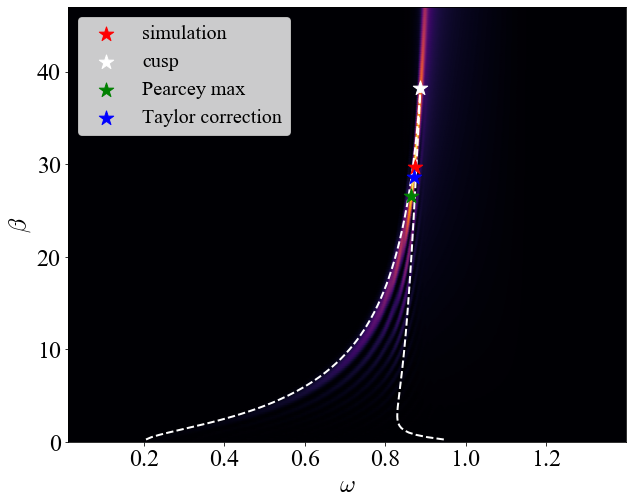

In [163]:
fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
               cmap='inferno', shading='gouraud')

# plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
plt.plot(w_left, beta_left, '--', color='white', linewidth=2, zorder=1)
plt.plot(w_right, beta_right, '--', color='white', linewidth=2, zorder=1)

plt.scatter(w_a0_list[idx][idx_w[0]], beta_arr[idx_beta[0]], color='red', marker='*', s=230, zorder=2, label='simulation')
plt.scatter(w_cusp[idx], beta_cusp[idx], color='white', marker='*', s=230, zorder=2, label='cusp')
plt.scatter(w_Pe[idx], beta_Pe[idx], color='green', marker='*', s=230, zorder=2, label='Pearcey max')
plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='blue', marker='*', s=230, zorder=2, label='Taylor correction')

ax.set_ylim([0.,47.])
# plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
plt.xlabel('$\omega$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='best', fontsize=20)
plt.show()